In [1]:
import xarray as xr
import numpy as np
from climatico import enso
from climatico.util import weighted_mean, pacific_lon
import matplotlib.pyplot as plt
import cftime
import cartopy
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import matplotlib.patches as mpatches
import cartopy.feature as cfeature
from shapely.geometry.polygon import Polygon

In [2]:
from config import directory_figs, directory_data

In [3]:
ninodata = xr.open_dataset(f'{directory_data}fig10_ninodata.nc')
ninadata = xr.open_dataset(f'{directory_data}fig11_ninadata.nc')

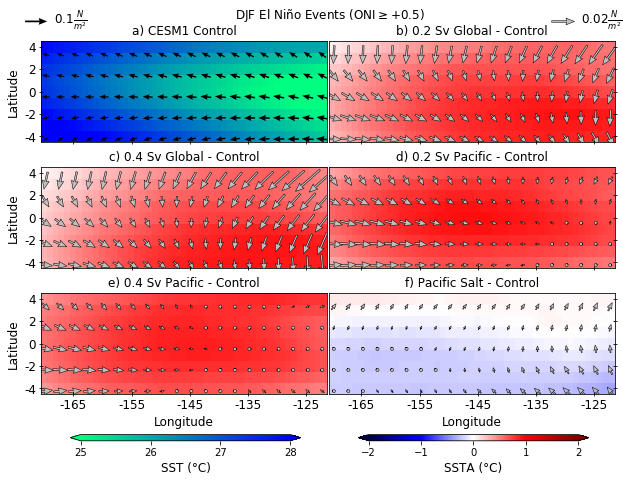

In [4]:
# --------------

a = u"\u00b0"
fig = plt.figure(figsize=(8,5))
fig.suptitle(u'DJF El Niño Events (ONI$\geq$+0.5)', x=0.5, y=1.075, fontsize=12)

# --------------

ax1 = plt.axes([0., 0.7, 0.495, 0.28])

ax1.set_title('a) CESM1 Control', fontsize=12)

cs1 = ax1.pcolormesh(
                ninodata.coords['lon'].values, ninodata.coords['lat'].values,
                ninodata['cntrl_diff_nino'].values, cmap='winter_r', vmin=25, vmax=28, shading='auto')

Q1 = ax1.quiver(ninodata.coords['lons'].values[::2], ninodata.coords['lats'].values[::2],
                ninodata['cntrl_diff_ninotx'].values[::2, ::2], 
                ninodata['cntrl_diff_ninoty'].values[::2, ::2], 
                headwidth=4, minshaft=1.5, minlength=2, pivot='mid', color='k', scale=0.79+0.5)

qk = ax1.quiverkey(Q1, 0.01, 1.035, 0.1, r'$0.1 \frac{N}{m^2}$', labelpos='E', 
                   fontproperties={'size': '12'},
                   coordinates='figure')

ax1.set_yticks([-4,-2,0,2,4])
ax1.set_yticklabels([-4,-2,0,2,4], fontsize=12)
ax1.set_xticks(ninodata.coords['lon'].values[5::10]+0.5)
ax1.set_xticklabels((ninodata.coords['lon'].values[5::10]-360.5).astype('int'), fontsize=12)
ax1.tick_params(axis='both', labelleft=True, left=True, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)
ax1.set_ylabel('Latitude', fontsize=12)

# --------------

ax2 = plt.axes([0.5, 0.7, 0.495, 0.28])

ax2.set_title('b) 0.2 Sv Global - Control', fontsize=12)

ax2.pcolormesh(
                ninodata.coords['lon'].values, ninodata.coords['lat'].values,
                ninodata['g02sv_diff_nino'].values, cmap='seismic', vmin=-2, vmax=2, shading='auto')

Q2 = ax2.quiver(ninodata.coords['lons'].values[::2], ninodata.coords['lats'].values[::2],
                ninodata['g02sv_diff_ninotx'].values[::2, ::2], 
                ninodata['g02sv_diff_ninoty'].values[::2, ::2], 
                headwidth=4, minshaft=1.5, minlength=2, pivot='mid', edgecolor='k', facecolor='0.75', linewidth=.5, scale=0.25)

Q2._init()

ax2.quiverkey(Q2, 0.925, 1.035, 0.02, r'$0.02 \frac{N}{m^2}$', labelpos='E', 
              fontproperties={'size': '12'},
              coordinates='figure')

ax2.set_yticks([-4,-2,0,2,4])
ax2.set_yticklabels([-4,-2,0,2,4], fontsize=12)
ax2.set_xticks(ninodata.coords['lon'].values[5::10]+0.5)
ax2.set_xticklabels((ninodata.coords['lon'].values[5::10]-360.5).astype('int'), fontsize=12)
ax2.tick_params(axis='both', labelleft=False, left=False, right=True, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)


# --------------

ax3 = plt.axes([0., 0.35, 0.495, 0.28])

ax3.set_title('c) 0.4 Sv Global - Control', fontsize=12)

ax3.pcolormesh(
                ninodata.coords['lon'].values, ninodata.coords['lat'].values,
                ninodata['g04sv_diff_nino'].values, cmap='seismic', vmin=-2, vmax=2, shading='auto')

ax3.quiver(ninodata.coords['lons'].values[::2], ninodata.coords['lats'].values[::2],
                ninodata['g04sv_diff_ninotx'].values[::2, ::2], 
                ninodata['g04sv_diff_ninoty'].values[::2, ::2], 
                headwidth=4, minshaft=1.5, minlength=2, pivot='mid', edgecolor='k', facecolor='0.75', linewidth=.5, scale=Q2.scale)

ax3.set_yticks([-4,-2,0,2,4])
ax3.set_yticklabels([-4,-2,0,2,4], fontsize=12)
ax3.set_xticks(ninodata.coords['lon'].values[5::10]+0.5)
ax3.set_xticklabels((ninodata.coords['lon'].values[5::10]-360.5).astype('int'), fontsize=12)
ax3.tick_params(axis='both', labelleft=True, left=True, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)
ax3.set_ylabel('Latitude', fontsize=12)

# --------------

ax4 = plt.axes([0.5, 0.35, 0.495, 0.28])

ax4.set_title('d) 0.2 Sv Pacific - Control', fontsize=12)

ax4.pcolormesh(
                ninodata.coords['lon'].values, ninodata.coords['lat'].values,
                ninodata['p02sv_diff_nino'].values, cmap='seismic', vmin=-2, vmax=2, shading='auto')

ax4.quiver(ninodata.coords['lons'].values[::2], ninodata.coords['lats'].values[::2],
                ninodata['p02sv_diff_ninotx'].values[::2, ::2], 
                ninodata['p02sv_diff_ninoty'].values[::2, ::2], 
                headwidth=4, minshaft=1.5, minlength=2, pivot='mid', edgecolor='k', facecolor='0.75', linewidth=.5, scale=Q2.scale)

ax4.set_yticks([-4,-2,0,2,4])
ax4.set_yticklabels([-4,-2,0,2,4], fontsize=12)
ax4.set_xticks(ninodata.coords['lon'].values[5::10]+0.5)
ax4.set_xticklabels((ninodata.coords['lon'].values[5::10]-360.5).astype('int'), fontsize=12)
ax4.tick_params(axis='both', labelleft=False, left=False, right=True, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

# --------------

ax5 = plt.axes([0., 0.0, 0.495, 0.28])

ax5.set_title('e) 0.4 Sv Pacific - Control', fontsize=12)

ax5.pcolormesh(
                ninodata.coords['lon'].values, ninodata.coords['lat'].values,
                ninodata['p04sv_diff_nino'].values, cmap='seismic', vmin=-2, vmax=2, shading='auto')

ax5.quiver(ninodata.coords['lons'].values[::2], ninodata.coords['lats'].values[::2],
                ninodata['p04sv_diff_ninotx'].values[::2, ::2], 
                ninodata['p04sv_diff_ninoty'].values[::2, ::2], 
                headwidth=4, minshaft=1.5, minlength=2, pivot='mid', edgecolor='k', facecolor='0.75', linewidth=.5, scale=Q2.scale)

ax5.set_yticks([-4,-2,0,2,4])
ax5.set_yticklabels([-4,-2,0,2,4], fontsize=12)
ax5.set_xticks(ninodata.coords['lon'].values[5::10]+0.5)
ax5.set_xticklabels((ninodata.coords['lon'].values[5::10]-360.5).astype('int'), fontsize=12)
ax5.tick_params(axis='both', labelleft=True, left=True, right=False, labelright=False, 
                direction='inout', labelbottom=True, bottom=True)
ax5.set_xlabel('Longitude', fontsize=12)
ax5.set_ylabel('Latitude', fontsize=12)

# --------------

ax6 = plt.axes([0.5, 0.0, 0.495, 0.28])

ax6.set_title('f) Pacific Salt - Control', fontsize=12)

cs2 = ax6.pcolormesh(
                ninodata.coords['lon'].values,
                ninodata.coords['lat'].values,
                ninodata['psalt_diff_nino'].values, cmap='seismic', vmin=-2, vmax=2, shading='auto')

ax6.quiver(ninodata.coords['lons'].values[::2], ninodata.coords['lats'].values[::2],
                ninodata['psalt_diff_ninotx'].values[::2, ::2], 
                ninodata['psalt_diff_ninoty'].values[::2, ::2], 
                headwidth=4, minshaft=1.5, minlength=2, pivot='mid', edgecolor='k', facecolor='0.75', linewidth=.5, scale=Q2.scale)

ax6.set_yticks([-4,-2,0,2,4])
ax6.set_yticklabels([-4,-2,0,2,4], fontsize=12)
ax6.set_xticks(ninodata.coords['lon'].values[5::10]+0.5)
ax6.set_xticklabels((ninodata.coords['lon'].values[5::10]-360.5).astype('int'), fontsize=12)
ax6.tick_params(axis='both', labelleft=False, left=False, right=True, labelright=False, 
                direction='inout', labelbottom=True, bottom=True)
ax6.set_xlabel('Longitude', fontsize=12)

# --------------

a = u"\u00b0"

cbar_ax = fig.add_axes([0.05, -0.13, 0.4, 0.0175])
ticks_1 = [25,26,27,28]
cbar = fig.colorbar(cs1, cax=cbar_ax, ticks=ticks_1[:], 
                    orientation='horizontal', extend='both')
cbar.set_label('SST ('+a+'C)', fontsize=12)

cbar_ax = fig.add_axes([0.55, -0.13, 0.4, 0.0175])
ticks_1 = [-2,-1,0,1,2]
cbar = fig.colorbar(cs2, cax=cbar_ax, ticks=ticks_1[:], 
                    orientation='horizontal', extend='both')
cbar.set_label('SSTA ('+a+'C)', fontsize=12)

# --------------

plt.savefig(f'{directory_figs}amocenso_fig10.png', bbox_inches='tight', dpi=200)
plt.show()

# --------------

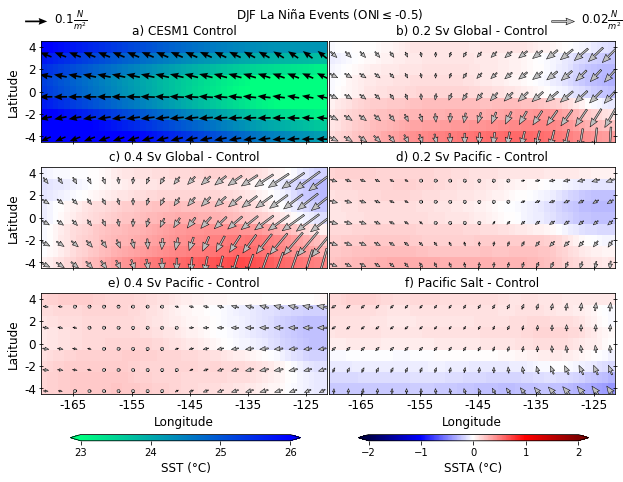

In [5]:
# --------------

a = u"\u00b0"
fig = plt.figure(figsize=(8,5))
fig.suptitle(u'DJF La Niña Events (ONI$\leq$-0.5)', x=0.5, y=1.075, fontsize=12)

# --------------

ax1 = plt.axes([0., 0.7, 0.495, 0.28])

ax1.set_title('a) CESM1 Control', fontsize=12)

cs1 = ax1.pcolormesh(
                ninadata.coords['lon'].values, ninadata.coords['lat'].values,
                ninadata['cntrl_diff_nina'].values, cmap='winter_r', vmin=23, vmax=26, shading='auto')

Q1 = ax1.quiver(ninadata.coords['lons'].values[::2], ninadata.coords['lats'].values[::2],
                ninadata['cntrl_diff_ninatx'].values[::2, ::2], 
                ninadata['cntrl_diff_ninaty'].values[::2, ::2], 
                headwidth=4, minshaft=1.5, minlength=2, pivot='mid', color='k', scale=0.79+0.5)

qk = ax1.quiverkey(Q1, 0.01, 1.035, 0.1, r'$0.1 \frac{N}{m^2}$', labelpos='E', 
                   fontproperties={'size': '12'},
                   coordinates='figure')

ax1.set_yticks([-4,-2,0,2,4])
ax1.set_yticklabels([-4,-2,0,2,4], fontsize=12)
ax1.set_xticks(ninadata.coords['lon'].values[5::10]+0.5)
ax1.set_xticklabels((ninadata.coords['lon'].values[5::10]-360.5).astype('int'), fontsize=12)
ax1.tick_params(axis='both', labelleft=True, left=True, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)
ax1.set_ylabel('Latitude', fontsize=12)

# --------------

ax2 = plt.axes([0.5, 0.7, 0.495, 0.28])

ax2.set_title('b) 0.2 Sv Global - Control', fontsize=12)

ax2.pcolormesh(
                ninadata.coords['lon'].values, ninadata.coords['lat'].values,
                ninadata['g02sv_diff_nina'].values, cmap='seismic', vmin=-2, vmax=2, shading='auto')

Q2 = ax2.quiver(ninadata.coords['lons'].values[::2], ninadata.coords['lats'].values[::2],
                ninadata['g02sv_diff_ninatx'].values[::2, ::2], 
                ninadata['g02sv_diff_ninaty'].values[::2, ::2], 
                headwidth=4, minshaft=1.5, minlength=2, pivot='mid', edgecolor='k', facecolor='0.75', linewidth=.5, scale=0.25)

Q2._init()

ax2.quiverkey(Q2, 0.925, 1.035, 0.02, r'$0.02 \frac{N}{m^2}$', labelpos='E', 
              fontproperties={'size': '12'},
              coordinates='figure')

ax2.set_yticks([-4,-2,0,2,4])
ax2.set_yticklabels([-4,-2,0,2,4], fontsize=12)
ax2.set_xticks(ninadata.coords['lon'].values[5::10]+0.5)
ax2.set_xticklabels((ninadata.coords['lon'].values[5::10]-360.5).astype('int'), fontsize=12)
ax2.tick_params(axis='both', labelleft=False, left=False, right=True, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)


# --------------

ax3 = plt.axes([0., 0.35, 0.495, 0.28])

ax3.set_title('c) 0.4 Sv Global - Control', fontsize=12)

ax3.pcolormesh(
                ninadata.coords['lon'].values, ninadata.coords['lat'].values,
                ninadata['g04sv_diff_nina'].values, cmap='seismic', vmin=-2, vmax=2, shading='auto')

ax3.quiver(ninadata.coords['lons'].values[::2], ninadata.coords['lats'].values[::2],
                ninadata['g04sv_diff_ninatx'].values[::2, ::2], 
                ninadata['g04sv_diff_ninaty'].values[::2, ::2], 
                headwidth=4, minshaft=1.5, minlength=2, pivot='mid', edgecolor='k', facecolor='0.75', linewidth=.5, scale=Q2.scale)

ax3.set_yticks([-4,-2,0,2,4])
ax3.set_yticklabels([-4,-2,0,2,4], fontsize=12)
ax3.set_xticks(ninadata.coords['lon'].values[5::10]+0.5)
ax3.set_xticklabels((ninadata.coords['lon'].values[5::10]-360.5).astype('int'), fontsize=12)
ax3.tick_params(axis='both', labelleft=True, left=True, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)
ax3.set_ylabel('Latitude', fontsize=12)

# --------------

ax4 = plt.axes([0.5, 0.35, 0.495, 0.28])

ax4.set_title('d) 0.2 Sv Pacific - Control', fontsize=12)

ax4.pcolormesh(
                ninadata.coords['lon'].values, ninadata.coords['lat'].values,
                ninadata['p02sv_diff_nina'].values, cmap='seismic', vmin=-2, vmax=2, shading='auto')

ax4.quiver(ninadata.coords['lons'].values[::2], ninadata.coords['lats'].values[::2],
                ninadata['p02sv_diff_ninatx'].values[::2, ::2], 
                ninadata['p02sv_diff_ninaty'].values[::2, ::2], 
                headwidth=4, minshaft=1.5, minlength=2, pivot='mid', edgecolor='k', facecolor='0.75', linewidth=.5, scale=Q2.scale)

ax4.set_yticks([-4,-2,0,2,4])
ax4.set_yticklabels([-4,-2,0,2,4], fontsize=12)
ax4.set_xticks(ninadata.coords['lon'].values[5::10]+0.5)
ax4.set_xticklabels((ninadata.coords['lon'].values[5::10]-360.5).astype('int'), fontsize=12)
ax4.tick_params(axis='both', labelleft=False, left=False, right=True, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

# --------------

ax5 = plt.axes([0., 0.0, 0.495, 0.28])

ax5.set_title('e) 0.4 Sv Pacific - Control', fontsize=12)

ax5.pcolormesh(
                ninadata.coords['lon'].values, ninadata.coords['lat'].values,
                ninadata['p04sv_diff_nina'].values, cmap='seismic', vmin=-2, vmax=2, shading='auto')

ax5.quiver(ninadata.coords['lons'].values[::2], ninadata.coords['lats'].values[::2],
                ninadata['p04sv_diff_ninatx'].values[::2, ::2], 
                ninadata['p04sv_diff_ninaty'].values[::2, ::2], 
                headwidth=4, minshaft=1.5, minlength=2, pivot='mid', edgecolor='k', facecolor='0.75', linewidth=.5, scale=Q2.scale)

ax5.set_yticks([-4,-2,0,2,4])
ax5.set_yticklabels([-4,-2,0,2,4], fontsize=12)
ax5.set_xticks(ninadata.coords['lon'].values[5::10]+0.5)
ax5.set_xticklabels((ninadata.coords['lon'].values[5::10]-360.5).astype('int'), fontsize=12)
ax5.tick_params(axis='both', labelleft=True, left=True, right=False, labelright=False, 
                direction='inout', labelbottom=True, bottom=True)
ax5.set_xlabel('Longitude', fontsize=12)
ax5.set_ylabel('Latitude', fontsize=12)

# --------------

ax6 = plt.axes([0.5, 0.0, 0.495, 0.28])

ax6.set_title('f) Pacific Salt - Control', fontsize=12)

cs2 = ax6.pcolormesh(
                ninadata.coords['lon'].values,
                ninadata.coords['lat'].values,
                ninadata['psalt_diff_nina'].values, cmap='seismic', vmin=-2, vmax=2, shading='auto')

ax6.quiver(ninadata.coords['lons'].values[::2], ninadata.coords['lats'].values[::2],
                ninadata['psalt_diff_ninatx'].values[::2, ::2], 
                ninadata['psalt_diff_ninaty'].values[::2, ::2], 
                headwidth=4, minshaft=1.5, minlength=2, pivot='mid', edgecolor='k', facecolor='0.75', linewidth=.5, scale=Q2.scale)

ax6.set_yticks([-4,-2,0,2,4])
ax6.set_yticklabels([-4,-2,0,2,4], fontsize=12)
ax6.set_xticks(ninadata.coords['lon'].values[5::10]+0.5)
ax6.set_xticklabels((ninadata.coords['lon'].values[5::10]-360.5).astype('int'), fontsize=12)
ax6.tick_params(axis='both', labelleft=False, left=False, right=True, labelright=False, 
                direction='inout', labelbottom=True, bottom=True)
ax6.set_xlabel('Longitude', fontsize=12)

# --------------

a = u"\u00b0"

cbar_ax = fig.add_axes([0.05, -0.13, 0.4, 0.0175])
ticks_1 = [23,24,25,26]
cbar = fig.colorbar(cs1, cax=cbar_ax, ticks=ticks_1[:], 
                    orientation='horizontal', extend='both')
cbar.set_label('SST ('+a+'C)', fontsize=12)

cbar_ax = fig.add_axes([0.55, -0.13, 0.4, 0.0175])
ticks_1 = [-2,-1,0,1,2]
cbar = fig.colorbar(cs2, cax=cbar_ax, ticks=ticks_1[:], 
                    orientation='horizontal', extend='both')
cbar.set_label('SSTA ('+a+'C)', fontsize=12)

# --------------

plt.savefig(f'{directory_figs}amocenso_fig11.png', bbox_inches='tight', dpi=200)
plt.show()

# --------------